In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)
pd.set_option('display.width', 100000000)
import warnings
warnings.filterwarnings("ignore")


#parent_path = os.path.abspath((os.path.dirname(__file__)))


purchases = pd.read_csv('/Users/servandodavidtorresgarcia/Servando/personal-pipeline/data/nsds_purchases.csv')
users = pd.read_csv('/Users/servandodavidtorresgarcia/Servando/personal-pipeline/data/nsds_users.csv' )

df = users.merge(purchases, on=['user_id'])

In [5]:
df.head()

,user_id,created_at,birthyear,gender,is_active,maildomain,region,orig_1,orig_2,utm_src,...,dx_0,dx_1,dx_2,dx_3,gx,im,purchased_at,value,product,product2
0,22451,2019-10-15 11:02:15,NaN,NaN,0,2354,96.0,30.0,NaN,151.0,...,46.663147,3.189534,43.612174,62.829195,15.892553,0.000005,2019-10-15 11:04:12,0.406513,2,1
1,22451,2019-10-15 11:02:15,NaN,NaN,0,2354,96.0,30.0,NaN,151.0,...,46.663147,3.189534,43.612174,62.829195,15.892553,0.000005,2019-10-15 11:04:12,0.376722,1,0
2,22451,2019-10-15 11:02:15,NaN,NaN,0,2354,96.0,30.0,NaN,151.0,...,46.663147,3.189534,43.612174,62.829195,15.892553,0.000005,2019-10-15 11:04:12,0.376722,4,1
3,22451,2019-10-15 11:02:15,NaN,NaN,0,2354,96.0,30.0,NaN,151.0,...,46.663147,3.189534,43.612174,62.829195,15.892553,0.000005,2020-03-16 13:29:25,0.410715,2,0
4,22451,2019-10-15 11:02:15,NaN,NaN,0,2354,96.0,30.0,NaN,151.0,...,46.663147,3.189534,43.612174,62.829195,15.892553,0.000005,2020-07-24 10:49:51,0.414388,4,0


In [10]:
df_raw = df.copy()
df = df[['user_id', 'purchased_at', 'product', 'product2', 'value']]

In [11]:
df['purchased_at'] = pd.to_datetime(df['purchased_at'])

In [13]:
df['product'] = df['product'].astype(object)
df['product2'] = df['product2'].astype(object)

In [14]:
#cohort

cohort = df.sort_values(['user_id', 'purchased_at']).groupby('user_id').first()

In [15]:
cohort

,purchased_at,product,product2,value
user_id,,,,
1,2020-09-25 02:35:38,3,1,0.388470
5,2018-07-19 15:16:53,2,1,0.404520
10,2018-03-19 13:55:25,1,1,0.281231
11,2019-07-15 14:33:29,3,1,0.341861
13,2019-06-18 20:15:43,2,1,0.499394
...,...,...,...,...
99987,2021-08-11 13:53:57,0,1,0.470869
99992,2021-08-11 17:04:35,2,1,0.425690
99993,2021-08-11 16:02:28,2,0,0.389898


In [23]:
cohort[['purchased_at', 'value']].reset_index() #.set_index('purchased_at').resample('MS').sum().plot()

,user_id,purchased_at,value
0,1,2020-09-25 02:35:38,0.388470
1,5,2018-07-19 15:16:53,0.404520
2,10,2018-03-19 13:55:25,0.281231
3,11,2019-07-15 14:33:29,0.341861
4,13,2019-06-18 20:15:43,0.499394
...,...,...,...
44570,99987,2021-08-11 13:53:57,0.470869
44571,99992,2021-08-11 17:04:35,0.425690
44572,99993,2021-08-11 16:02:28,0.389898
44573,99996,2021-08-11 16:34:27,0.341417


In [25]:
cohort = cohort.reset_index()

<AxesSubplot:xlabel='purchased_at'>

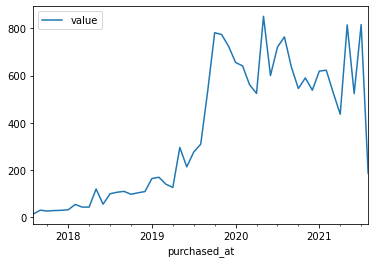

In [30]:
cohort[['purchased_at', 'value']].set_index('purchased_at').resample('MS').sum().plot() # resample

In [31]:
ids = cohort['user_id'].unique()
ids_selected = ids[0:10]

In [32]:
cohort_subset = cohort[cohort['user_id'].isin(ids_selected)].groupby(['user_id', 'purchased_at']).sum().reset_index()

In [33]:
cohort_subset

,user_id,purchased_at,product,product2,value
0,1,2020-09-25 02:35:38,3,1,0.388470
1,5,2018-07-19 15:16:53,2,1,0.404520
2,10,2018-03-19 13:55:25,1,1,0.281231
3,11,2019-07-15 14:33:29,3,1,0.341861
4,13,2019-06-18 20:15:43,2,1,0.499394
5,15,2018-07-09 19:27:59,3,1,0.387298
6,16,2018-06-17 17:02:16,4,0,0.447778
7,17,2018-08-05 19:47:49,3,0,0.528577
8,19,2019-02-07 12:07:54,4,0,0.352050
9,22,2019-10-02 12:13:12,3,0,0.358025


In [58]:
n_days = 90 
max_date= cohort['purchased_at'].max()
cutoff = max_date - pd.to_timedelta(n_days, unit='d')

In [60]:
cohort = cohort.sort_values('purchased_at', ascending= False)

In [61]:
cohort.head()

,user_id,purchased_at,product,product2,value
17858,36296,2021-08-11 17:56:47,3,0,0.295420
44574,99999,2021-08-11 17:26:42,4,1,0.462536
44571,99992,2021-08-11 17:04:35,2,1,0.425690
31048,66806,2021-08-11 16:56:36,1,0,0.327062
44573,99996,2021-08-11 16:34:27,4,1,0.341417


In [66]:
ninty_days = cohort.iloc[0:90]

In [73]:
cutoff

Timestamp('2021-05-13 17:56:47')

In [72]:
ninty_days

,user_id,purchased_at,product,product2,value
17858,36296,2021-08-11 17:56:47,3,0,0.295420
44574,99999,2021-08-11 17:26:42,4,1,0.462536
44571,99992,2021-08-11 17:04:35,2,1,0.425690
31048,66806,2021-08-11 16:56:36,1,0,0.327062
44573,99996,2021-08-11 16:34:27,4,1,0.341417
44572,99993,2021-08-11 16:02:28,2,0,0.389898
44570,99987,2021-08-11 13:53:57,0,1,0.470869
44566,99978,2021-08-11 13:29:56,4,1,0.401135
44569,99985,2021-08-11 13:16:43,4,1,0.445630
44568,99983,2021-08-11 12:55:30,2,1,0.448792


In [74]:
minor_ninty_days = cohort.iloc[90:]

In [75]:
#make targets

ninty_days.head()

,user_id,purchased_at,product,product2,value
17858,36296,2021-08-11 17:56:47,3,0,0.295420
44574,99999,2021-08-11 17:26:42,4,1,0.462536
44571,99992,2021-08-11 17:04:35,2,1,0.425690
31048,66806,2021-08-11 16:56:36,1,0,0.327062
44573,99996,2021-08-11 16:34:27,4,1,0.341417


In [77]:
ninty_days.drop(['product', 'product2'], axis=1, inplace=True)

In [81]:
targets_df = ninty_days.groupby('user_id').sum().rename({'value':'spend_90_total'}, axis = 1).assign(spend_90_flag = 1)

In [82]:
targets_df.head()

,spend_90_total,spend_90_flag
user_id,,
2079,0.288675,1
9638,0.327217,1
16105,0.397848,1
17323,0.448792,1
25024,0.428174,1


In [83]:
#make recency

minor_ninty_days

max_date_minor_ninty_days = minor_ninty_days['purchased_at'].max()

In [86]:
minor_ninty_days[['user_id', 'purchased_at']].groupby('user_id').apply(lambda x: x['purchased_at'].max()- max_date_minor_ninty_days / pd.to_timedelta(1, 'day'))

TypeError: unsupported operand type(s) for /: 'Timestamp' and 'Timedelta'